In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
import os
import matplotlib.pyplot as plt

%run -i /Users/marie/Documents/Research/dataproc/tools/decont.py

## Using Francisco's code for decontamination in the first Population

In [2]:
clu1 = Table.read('Catalogues/NGC2539_8_Pop1.csv', format='csv')
# = pd.read_csv('Catalogues/NGC2539_8_Pop1.csv')
clu1

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
122.48086388747,-13.40858011558,5725195086362592896,0.0091,0.0076,0.7372,0.0136,2.353,-2.286,0.013,-0.556,0.01,31,1.625,--,0.988,13.472965,13.666136,13.149684,0.516452,--,-32.62677706958,122.48087433352,-13.40857764501,0.779411
122.41419604065,-13.31485008955,5725199621848057984,0.0086,0.0071,0.7725,0.0128,2.388,-2.311,0.012,-0.6,0.01,31,1.603,--,0.93,13.363639,13.594479,12.984633,0.609845,38.47,-32.55253367565,122.41420659695,-13.31484742205,0.814383
122.25076116513,-13.17047863115,5725956017127403648,0.0172,0.0129,0.7394,0.0263,2.385,-2.347,0.027,-0.421,0.018,31,1.56,--,1.056,14.92669,15.24017,14.44282,0.797351,--,-32.45296218637,122.25077187859,-13.17047676146,0.781669
122.10340564001,-13.06457666366,5725970276418851328,0.0126,0.0091,0.7605,0.0178,2.361,-2.301,0.019,-0.531,0.012,31,1.601,--,0.998,13.934523,14.170032,13.552169,0.617864,24.37,-32.38646174051,122.10341613701,-13.06457430288,0.8026979999999999
122.77514461457,-13.47997859179,5726679491477381504,0.0099,0.0081,0.6943,0.0144,2.384,-2.35,0.014,-0.4,0.011,31,1.648,--,1.056,13.190701,13.337885,12.910949,0.426936,--,-32.62293554362,122.77515535426,-13.47997681325,0.7366670000000001
122.73624751764,-13.47753088601,5726679633214860928,0.0129,0.0106,0.7834,0.0185,2.562,-2.527,0.019,-0.423,0.015,31,1.587,--,1.116,14.18648,14.451936,13.763537,0.688398,25.56,-32.63023528292,122.73625906589,-13.4775290072,0.825525
122.78368365523,-13.41520916464,5726681488640685184,0.0423,0.0363,0.7713,0.0663,2.314,-2.275,0.064,-0.424,0.051,31,1.46,--,1.011,16.854256,17.403913,16.152836,1.251078,--,-32.55819490578,122.78369405069,-13.41520728195,0.80204
122.73184830025,-13.39906024329,5726682381993905024,0.0422,0.0337,0.808,0.0587,2.485,-2.419,0.063,-0.569,0.049,31,1.47,--,0.988,16.782969,17.320848,16.116566,1.204283,--,-32.55545734659,122.73185935349,-13.39905771223,0.839032
122.56110691091,-13.42478775587,5726684271779588736,0.0341,0.0254,0.7642,0.0499,2.273,-2.225,0.051,-0.461,0.037,31,1.497,--,0.974,16.478354,16.935442,15.857834,1.077608,--,-32.6226350709,122.56111707925,-13.42478570522,0.796305


In [17]:
input_file = 'Catalogues/NGC2539_8_Pop1.csv'
features = ['Gmag','BPmag-RPmag',"pmRA","pmDE"]
coordinates = ['RA_ICRS','DE_ICRS']
table = Table.read(input_file)

table = field_select(table,
                     cluster_center=(122.6580, -12.8340),
                     limiting_radii=[0, 0.6],
                     field_radii=[0.6],
                     coord_columns= coordinates,
                     footprint_geometry= "circle")

table = pert2d(table, features=features, cells=[1.5,0.75, 0.2, 0.2])


         data            area
cluster  (459, 4)        1.13097
field    (9, 4)        0.37613
 
feature     min     max     std    cell    ncells
Gmag        10.26   20.33   1.87   1.50      7
BPmag-RPmag        0.00    1.85   0.37   0.75      3
pmRA        -2.64   -1.97   0.10   0.20      4
pmDE        -0.89   -0.17   0.10   0.20      4


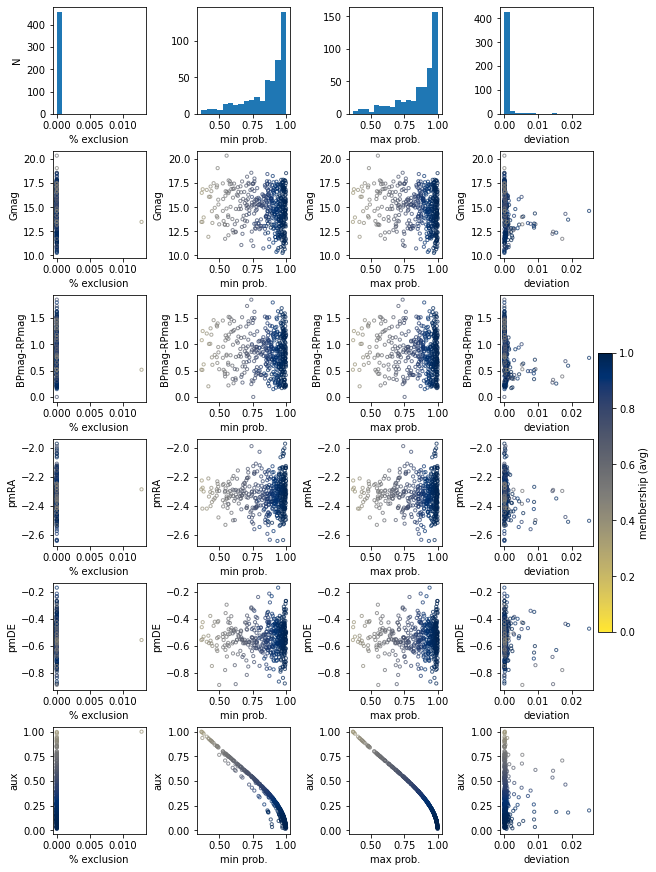

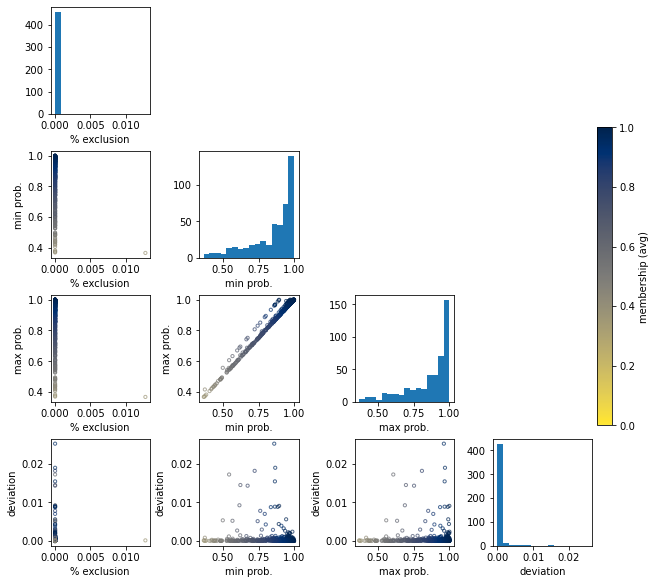

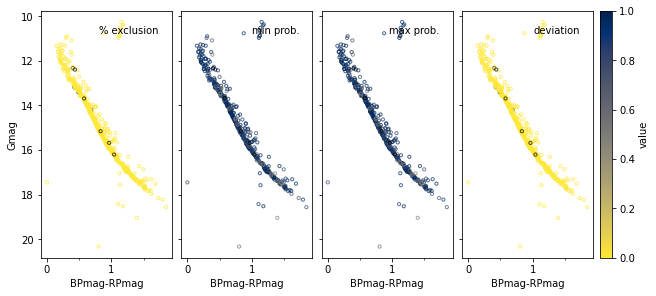

In [19]:
columns = ['excl','min','max','std']
labels = ['% exclusion', 'min prob.', 'max prob.', 'deviation']
plot_membership(table, columns, features+['aux'],
                labels=labels, color='avg', output='pert2d_ngc6242.pdf')

377


(<Figure size 700x300 with 4 Axes>,
 array([<Axes: xlabel='BPmag-RPmag', ylabel='Gmag'>,
        <Axes: xlabel='BPmag-RPmag'>, <Axes: xlabel='BPmag-RPmag'>],
       dtype=object))

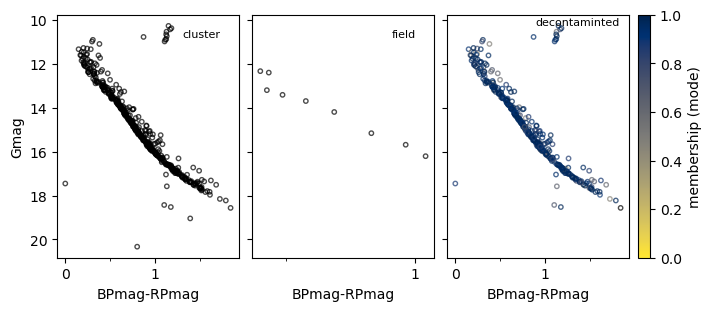

In [26]:
member = (table['excl'] <= 1) & (table['max'] > 0.7) & (table['std'] < 0.01)
print(np.sum(member))
plot_memb_cmd(table, ['Gmag','BPmag-RPmag'])

In [29]:
data1 = table[member]

In [30]:
#data1.write('Catalogues/NGC2539_10_Pop1.csv', format='csv', overwrite=True)

## Using Francisco's code for decontamination in the second Population

In [9]:
clu2 = Table.read('Catalogues/NGC2539_9_Pop2.csv', format='csv')
# = pd.read_csv('Catalogues/NGC2539_9_Pop2.csv')
clu2

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
120.75024500753,-12.17685469873,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,1.178,0.099,31,1.376,--,1.031,18.310925,19.15596,17.442314,1.713646,--,-31.84913060615,120.75025957629,-12.17685993526,0.8938269999999999
120.74850242298,-12.16904778162,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,0.119,0.432,95,--,1.4111,1.033,20.078209,20.758951,19.249168,1.509783,--,-31.84195855656,120.74851389143,-12.16904830919,0.798188
120.77480108819,-12.16391581299,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,-0.784,0.31,31,1.506,--,1.023,19.835163,20.270933,19.323252,0.947681,--,-31.83081942864,120.77480987849,-12.16391232985,0.7973359999999999
120.83079927617,-12.11014011047,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,1.251,0.43,95,--,1.3247,1.015,20.33407,21.634747,19.380322,2.254425,--,-31.76549006627,120.83081769654,-12.11014567255,0.819051
120.80165713606,-12.01664645017,3036177527608927616,0.1308,0.1002,0.8452,0.2183,1.88,-1.865,0.206,-0.244,0.153,31,1.429,--,1.009,18.960209,19.550852,18.278694,1.272158,--,-31.68154635169,120.80166560868,-12.01664536448,0.866427
120.80101107005,-12.01406385941,3036177531903817600,0.3012,0.2494,0.8328,0.4847,2.574,-2.554,0.442,0.324,0.345,95,--,1.2617,1.042,19.914051,21.13314,18.79099,2.34215,--,-31.67919007956,120.80102267552,-12.01406529825,0.802011
120.8451726333,-11.95378761004,3036178184739509760,0.2996,0.2205,0.8932,0.5969,4.116,-3.944,0.447,1.176,0.357,95,--,1.4063,0.974,20.00084,20.934265,19.032677,1.901588,--,-31.61032436187,120.84519055292,-11.95379283861,0.887624
120.82862580843,-11.95725929856,3036181105319332480,0.011,0.0089,0.7827,0.0174,2.407,-2.268,0.018,0.805,0.014,31,1.617,--,1.267,12.007233,12.213915,11.656758,0.557157,-17.66,-31.61757095062,120.82863611177,-11.95726287568,0.8222119999999999
120.90412487436,-11.91961034771,3037679563569184000,0.118,0.0983,0.7121,0.1805,2.856,-2.851,0.187,0.16,0.152,31,1.428,--,1.036,18.7973,19.42811,18.06648,1.36163,--,-31.5633218658,120.90413782694,-11.91961105743,0.7341479999999999


In [31]:
input_file = 'Catalogues/NGC2539_9_Pop2.csv'
features = ['Gmag','BPmag-RPmag',"pmRA","pmDE"]
coordinates = ['RA_ICRS','DE_ICRS']
table = Table.read(input_file)

table = field_select(table,
                     cluster_center=(122.6580, -12.8340),
                     limiting_radii=[0, 0.6],
                     field_radii=[0.6],
                     coord_columns= coordinates,
                     footprint_geometry= "circle")

table = pert2d(table, features=features, cells=[1.5,0.75, 0.2, 0.2])


         data            area
cluster  (330, 4)        1.13097
field    (2757, 4)        11.43098
 
feature     min     max     std    cell    ncells
Gmag        10.61   20.83   1.79   1.50      7
BPmag-RPmag       -0.38    2.49   0.47   0.75      4
pmRA        -4.31   -1.26   0.74   0.20     16
pmDE        -1.27    1.41   0.64   0.20     14


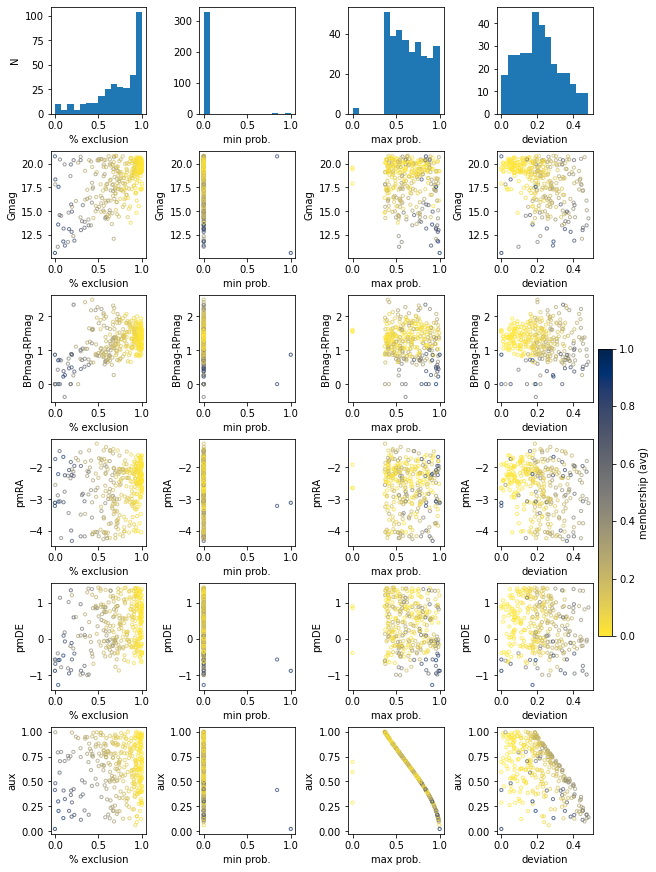

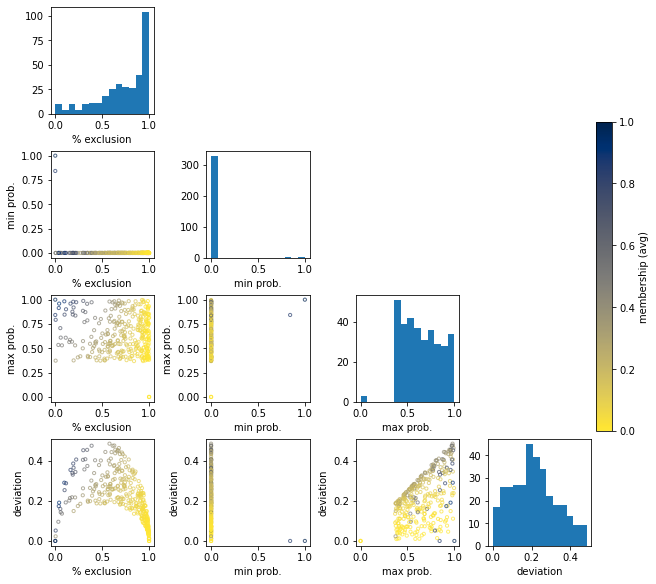

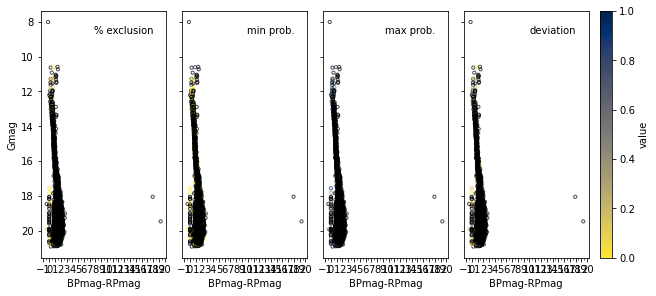

In [32]:
columns = ['excl','min','max','std']
labels = ['% exclusion', 'min prob.', 'max prob.', 'deviation']
plot_membership(table, columns, features+['aux'],
                labels=labels, color='avg', output='pert2d_ngc6242.pdf')

154


(<Figure size 700x300 with 4 Axes>,
 array([<Axes: xlabel='BPmag-RPmag', ylabel='Gmag'>,
        <Axes: xlabel='BPmag-RPmag'>, <Axes: xlabel='BPmag-RPmag'>],
       dtype=object))

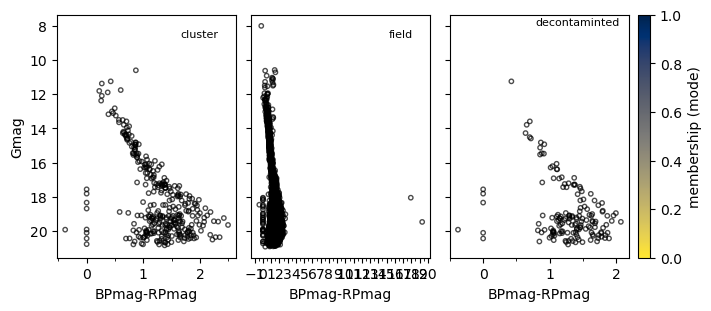

In [45]:
member = (table['excl'] < 1.0) & (table['min'] < 0.5) & (table['std'] < 0.2)
print(np.sum(member))
plot_memb_cmd(table, ['Gmag','BPmag-RPmag'])